<table align="center" width=100%>
    <tr>
        <td width="20%">
            <img src="in_class.png">
        </td>
        <td>
            <div align="center">
                <font color="#21618C" size=8px>
                    <b> Inclass - Lab <br>(Day 1 )
                    </b>
                </font>
            </div>
        </td>
         <td width="25%">
            <img src="GL-2.png">
        </td>
    </tr>
</table>

### About the data set (Heart disease data)

The dataset contains information about patients. The aim is to find whether or not a patient has cardiovascular disease based on the several factors from the patient profile. <br> Attribute information:

**male:** Gender of patient: male(1) or female(0)

**age:** Age of patient

**education:** Education level of patient: 1 = Some High School; 2 = High School or GED; 3 = Some College or Vocational School; 4 = college

**currentSmoker:** Whether the patient is a smoker now: Yes(1) or No(0)

**cigsPerDay:** Average number of cigarettes smoked by patient per day

**BPMeds:** Whether the patient is on blood pressure medications: Yes(1) or No(0)

**prevalentStroke:** If the patient has a history of heart stroke: Yes(1) or No(0)

**prevalentHyp:** If the patient has a history of hypertension: Yes(1) or No(0)

**diabetes:**  If the patient has a diabetes: Yes(1) or No(0)

**totChol:** Average cholesterol levels in mg/dL

**sysBP:** Average systolic blood pressure of patient

**diaBP:** Average diastolic blood pressure of patient

**BMI:** BMI of patient

**heartRate:** Avergae heartrate of patient

**glucose:** Average blood glucose levels of patient

**CVD:** Does the patient have cardiovascular disease: Yes(1) or No(0)

## Table of Content

**Day1**

1. **[Logistic Regression Model](#logreg)**

**Day2**

2. **[Model Evaluation Metrics](#mod_eval)**
3. **[Performance Evaluation Metrics](#perf_eval)**
4. **[Determining optimal threshold](#opt)**

**Import the required libraries**

In [ ]:
import numpy as np
import pandas as pd
import statsmodels.api as sma
import matplotlib.pyplot as plt

#### Load the csv file

In [ ]:
df=pd.read_csv("/content/Heart_disease.csv")
df.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,CVD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


### Let's begin with some hands-on practice exercises

<a id="logreg"> </a>
## 1. Logistic regression model

## We shall use the heart disease dataset

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>1. Are all the classes of target variable 'CVD' fairly represented by records in the considered dataset ?</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [ ]:
df["CVD"].value_counts()

0    3596
1     644
Name: CVD, dtype: int64

<Axes: ylabel='CVD'>

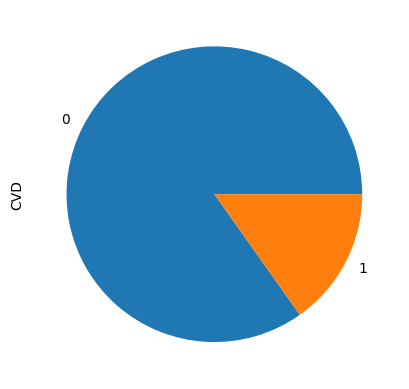

In [ ]:
df["CVD"].value_counts().plot(kind="pie")

NO the data is not fairly distributed

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>2. Predict whether or not a patient will have cardiovascular disease based on the information about blood pressure of the patient. Columns related to blood pressure are diaBP, sysBP and BPMeds.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [ ]:
df.columns
data=df[[#'male', 'age', 'education', 'currentSmoker', 'cigsPerDay',
   'BPMeds',
      # 'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol',
   'sysBP',
      #
   'diaBP', #'BMI', 'heartRate', 'glucose',
    'CVD'
   ]]

data.dropna(inplace=True)
data.head()

<ipython-input-19-88798edbcf17>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.dropna(inplace=True)


,BPMeds,sysBP,diaBP,CVD
0,0.0,106.0,70.0,0
1,0.0,121.0,81.0,0
2,0.0,127.5,80.0,0
3,0.0,150.0,95.0,1
4,0.0,130.0,84.0,0


In [ ]:
X=data[[#'male', 'age', 'education', 'currentSmoker', 'cigsPerDay',
   'BPMeds',
      # 'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol',
   'sysBP',
      #
   'diaBP', #'BMI', 'heartRate', 'glucose',
        ]]
Y=data['CVD']

model=sma.Logit(Y,sma.add_constant(X)).fit()
model.summary()

Optimization terminated successfully.
         Current function value: 0.403052
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                    CVD   No. Observations:                 4187
Model:                          Logit   Df Residuals:                     4183
Method:                           MLE   Df Model:                            3
Date:                Tue, 09 Jan 2024   Pseudo R-squ.:                 0.05109
Time:                        17:34:52   Log-Likelihood:                -1687.6
converged:                       True   LL-Null:                       -1778.4
Covariance Type:            nonrobust   LLR p-value:                 3.722e-39
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -4.6405      0.309    -15.019      0.000      -5.246      -4.035
BPMeds         0.3228      0.212      1.521      0.128      -0.093       0.739
sysBP          0.0273      0.003      9.319      0.000       0.022       0.033
diaBP         -0.0097      0.006     -1.764      0.078      -0.021       0.001
==============================================================================
"""

Calculate the difference between LL and LLnull , if its too low multicollinarity exists

<br>
Check the significance of the features, P value

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>3. Predict whether or not a patient has cardiovascular disease using the categorical variables in the dataset. How does a unit change in each feature influence the odds of a patient having a cardiocascular disease?</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [ ]:
data=df[['male',
    #'age',
    'education', 'currentSmoker',
    #'cigsPerDay',
    'BPMeds',
    'prevalentStroke',
    'prevalentHyp',
    'diabetes', #'totChol', 'sysBP',
       #'diaBP', 'BMI', 'heartRate', 'glucose',
    'CVD']]

In [ ]:
data.dropna(inplace=True)

<ipython-input-44-f1116dacf2bb>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.dropna(inplace=True)


In [ ]:
X=data.drop('CVD',axis=1)
Y=data['CVD']

model=sma.Logit(Y,sma.add_constant(X)).fit()
model.summary()

Optimization terminated successfully.
         Current function value: 0.400810
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                    CVD   No. Observations:                 4082
Model:                          Logit   Df Residuals:                     4074
Method:                           MLE   Df Model:                            7
Date:                Tue, 09 Jan 2024   Pseudo R-squ.:                 0.05625
Time:                        17:49:13   Log-Likelihood:                -1636.1
converged:                       True   LL-Null:                       -1733.6
Covariance Type:            nonrobust   LLR p-value:                 1.283e-38
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -2.2179      0.124    -17.815      0.000      -2.462      -1.974
male                0.4934      0.092      5.339      0.000       0.312       0.675
education          -0.1181      0.045     -2.601      0.009      -0.207      -0.029
currentSmoker       0.1434      0.093      1.543      0.123      -0.039       0.326
BPMeds              0.5459      0.210      2.595      0.009       0.134       0.958
prevalentStroke     0.9008      0.437      2.061      0.039       0.044       1.757
prevalentHyp        0.9001      0.094      9.554      0.000       0.715       1.085
diabetes            1.0179      0.216      4.714      0.000       0.595       1.441
===================================================================================
"""

In [ ]:
pred_p=model.predict(sma.add_constant(X))
np.where(pred_p>0.5,1,0)

array([0, 0, 0, ..., 0, 0, 0])

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>4. Predit if a patient has cardiovascular disease based on whether or not the patient has history of hypertension. Calculate the odds ratio.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [ ]:
pd.crosstab(df["prevalentHyp"],df["CVD"],margins=True)

CVD,0,1,All
prevalentHyp,,,
0,2604,319,2923
1,992,325,1317
All,3596,644,4240


In [ ]:
#cardiovascular disease based on whether or not the patient has history of hypertension.

325/992

0.3276209677419355

<table align="center" width=100%>
    <tr>
        <td width="20%">
            <img src="in_class.png">
        </td>
        <td>
            <div align="center">
                <font color="#21618C" size=8px>
                    <b> Inclass - Lab <br>(Day 2)
                    </b>
                </font>
            </div>
        </td>
         <td width="25%">
            <img src="GL-2.png">
        </td>
    </tr>
</table>

<a id="mod_eval"> </a>
## 2. Model Evaluation Metrics

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>5. Build a full model to predict if a patient will have a cardiovascular disease. Find the value of Mcfadden's R<sup>2</sup>.
                </font>
            </div>
        </td>
    </tr>
</table>

In [ ]:
df.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,CVD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [ ]:
data=df
data.dropna(inplace=True)
X=data.drop("CVD",axis=1)
Y=data["CVD"]

model=sma.Logit(Y,sma.add_constant(X)).fit()
model.summary()

Optimization terminated successfully.
         Current function value: 0.376500
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                    CVD   No. Observations:                 3658
Model:                          Logit   Df Residuals:                     3642
Method:                           MLE   Df Model:                           15
Date:                Tue, 09 Jan 2024   Pseudo R-squ.:                  0.1175
Time:                        19:13:18   Log-Likelihood:                -1377.2
converged:                       True   LL-Null:                       -1560.6
Covariance Type:            nonrobust   LLR p-value:                 6.676e-69
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -8.3282      0.715    -11.640      0.000      -9.730      -6.926
male                0.5553      0.109      5.093      0.000       0.342       0.769
age                 0.0635      0.007      9.509      0.000       0.050       0.077
education          -0.0478      0.049     -0.967      0.334      -0.145       0.049
currentSmoker       0.0716      0.157      0.457      0.648      -0.236       0.379
cigsPerDay          0.0179      0.006      2.872      0.004       0.006       0.030
BPMeds              0.1625      0.234      0.693      0.488      -0.297       0.622
prevalentStroke     0.6937      0.490      1.417      0.157      -0.266       1.653
prevalentHyp        0.2342      0.138      1.697      0.090      -0.036       0.505
diabetes            0.0392      0.316      0.124      0.901      -0.579       0.658
totChol             0.0023      0.001      2.070      0.038       0.000       0.005
sysBP               0.0154      0.004      4.044      0.000       0.008       0.023
diaBP              -0.0042      0.006     -0.646      0.518      -0.017       0.008
BMI                 0.0067      0.013      0.523      0.601      -0.018       0.032
heartRate          -0.0032      0.004     -0.771      0.441      -0.012       0.005
glucose             0.0071      0.002      3.190      0.001       0.003       0.012
===================================================================================
"""

In [ ]:
model.prsquared

0.11749095310770752

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>6. Find the significant variables in the full model when all the variables are considered in prediction of whether or not a patient has cardiovascular disease.
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [ ]:
model.pvalues[model.pvalues>0.05]

education          0.333531
currentSmoker      0.647829
BPMeds             0.488021
prevalentStroke    0.156519
prevalentHyp       0.089728
diabetes           0.901205
diaBP              0.518311
BMI                0.600975
heartRate          0.440817
dtype: float64

In [ ]:
y_pred=model.predict(sma.add_constant(X))
y_pred=np.where(y_pred>0.5,1,0)

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>7. How do the coefficients of each feature form the dataset impact the odds of a patient having a cardiovascular disease?
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

<a id="perf_eval"> </a>
## 3. Performance evaluation metrics

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                        <b>8. For the full model, calculate the accuracy manually using the confusion matrix. Consider 0.5 as the probability threshold.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [ ]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_pred,Y)

array([[3082,  506],
       [  19,   51]])

In [ ]:
from sklearn.metrics import accuracy_score

accuracy_score(y_pred,Y)

0.856478950246036

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>9.  Calculate value of kappa for the full model built in question 5. Consider threshold value as 0.18</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [ ]:
from sklearn.metrics import cohen_kappa_score
cohen_kappa_score(y_pred,Y)

0.13320900204280028

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>10. Identify the features from the dataset that are involved in multicollinearity. After that, split the updated data using train_test_split.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=[]
for i in range(X.shape[1]):
  vif.append(variance_inflation_factor(X.values,i))

pd.DataFrame({"Feature":X.columns,"VIF":vif}).sort_values(by="VIF",ascending=False)


,Feature,VIF
10,sysBP,137.990950
11,diaBP,136.502294
12,BMI,45.377821
1,age,40.569218
13,heartRate,38.578765
9,totChol,32.171894
14,glucose,19.739637
3,currentSmoker,4.932308
2,education,4.650989
4,cigsPerDay,4.291149


In [ ]:
#Drop each features one by one with highest VIF values
X.drop("sysBP", axis=1, inplace=True)



KeyError: "['sysBP'] not found in axis"

In [ ]:
from statsmodels.stats.outliers_influence import  variance_inflation_factor
vif=[]
for i in range(X.shape[1]):
  vif.append(variance_inflation_factor(X.values,i))

pd.DataFrame({"Feature": X.columns, "VIF":vif}).sort_values(by="VIF", ascending=False)

,Feature,VIF
10,diaBP,72.092952
11,BMI,45.355055
12,heartRate,38.280312
1,age,36.088948
9,totChol,32.093565
13,glucose,19.543031
3,currentSmoker,4.929145
2,education,4.638026
4,cigsPerDay,4.291053
0,male,2.132304


In [ ]:
X.drop("diaBP", axis=1, inplace=True)

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=[]

for i in range(X.shape[1]):
  vif.append(variance_inflation_factor(X.values,i))

pd.DataFrame({"feature":X.columns, "VIF": vif})

,feature,VIF
0,male,2.112094
1,age,34.539418
2,education,4.529664
3,currentSmoker,4.925680
4,cigsPerDay,4.290939
5,BPMeds,1.128883
6,prevalentStroke,1.022995
7,prevalentHyp,1.713707
8,diabetes,1.573608
9,totChol,31.204337


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>11. Use the data obtained from Q10 and identify 5 features that contribute most in the prediction of target variable.<br></b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42, stratify=Y)

In [ ]:
model.pvalues

const              2.566039e-31
male               3.528866e-07
age                1.921049e-21
education          3.335308e-01
currentSmoker      6.478285e-01
cigsPerDay         4.083450e-03
BPMeds             4.880213e-01
prevalentStroke    1.565187e-01
prevalentHyp       8.972781e-02
diabetes           9.012046e-01
totChol            3.849918e-02
sysBP              5.243701e-05
diaBP              5.183106e-01
BMI                6.009754e-01
heartRate          4.408166e-01
glucose            1.422015e-03
dtype: float64

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>12. Build a model using the features obtained in question 11. For the model find:
                        <ol>                       
                         <li>Accuracy</li>
                        <li>F<sub>1</sub> score</li>
                        </ol>
                        </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [ ]:
from sklearn.metrics import f1_score
f1_score(y_pred,Y)

0.16267942583732056

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_pred,Y)

0.856478950246036

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>13. Compare the full model in question 5 and the model built in question 12 using their ROC curves. </b>
                </font>
            </div>
        </td>
    </tr>
</table>

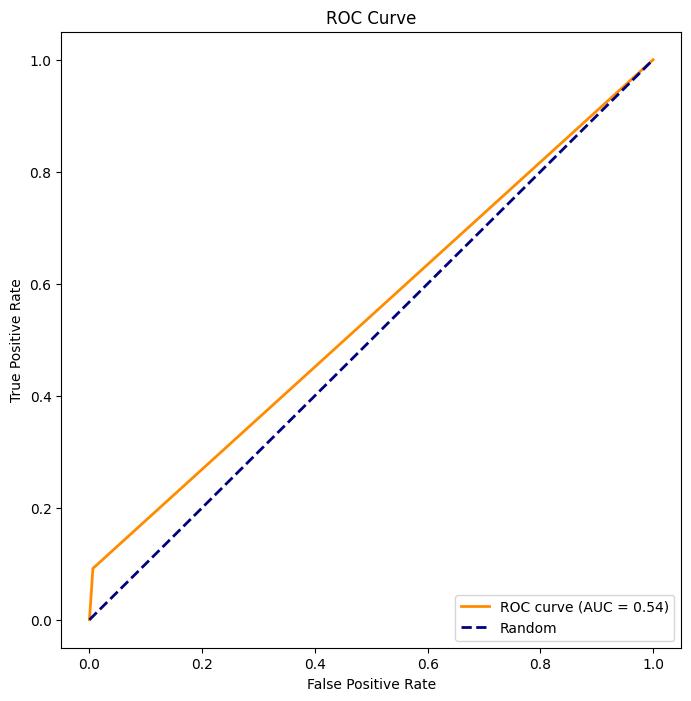

In [ ]:
from sklearn.metrics import roc_curve,auc



fpr, tpr, thresholds = roc_curve(Y, y_pred)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>14. Build a logistic regression model using information about heart rate of the patients. Compute the AUC score.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

ValueError: x is neither increasing nor decreasing : [0 0 0 ... 0 0 0].

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>15. Calculate the cross entropy for the model built in question 14.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [ ]:
# manual claculation

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>16. Compare the model built in question 14 to the full model built in question 5.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [ ]:
# type your code here

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>17. What is the cross entropy for the full model? Use the full model in Q5.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>18. Predict whether a patient has cardiovascular disease based on smoking habits of the patient. For the model find the following:<br> <ol type = "a">
                        <li> Precision </li>
                        <li> Recall</li>   
                        <li> F<sub>1</sub> score </li>
                        </ol>
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [ ]:
# type your code here

<a id="opt"> </a>
## 4. Determining optimal threshold

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>19. Obtain the optimal value threshold for the full model using the Youden's index.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

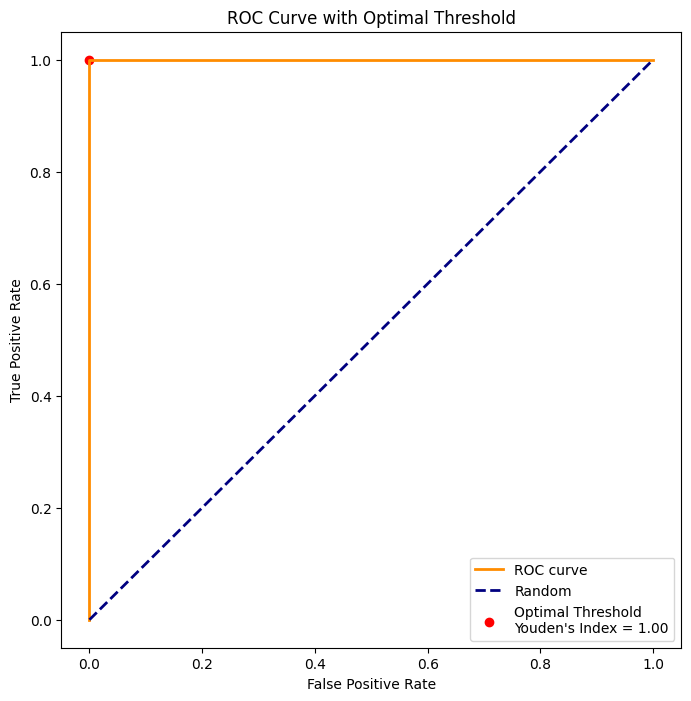

Optimal Threshold: 0.6


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Assuming y_true contains true labels (0 or 1) and y_prob contains predicted probabilities
y_true = np.array([1, 0, 1, 1, 0, 0, 1, 0])
y_prob = np.array([0.8, 0.3, 0.6, 0.7, 0.2, 0.1, 0.9, 0.4])

# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y_true, y_prob)

# Calculate Youden's Index for each threshold
youden_index = tpr - fpr

# Find the optimal threshold that maximizes Youden's Index
optimal_threshold = thresholds[np.argmax(youden_index)]

# Plot the ROC curve
plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random')
plt.scatter(fpr[np.argmax(youden_index)], tpr[np.argmax(youden_index)], c='red', marker='o', label=f'Optimal Threshold\nYouden\'s Index = {youden_index.max():.2f}')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve with Optimal Threshold')
plt.legend(loc='lower right')
plt.show()

print("Optimal Threshold:", optimal_threshold)

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>20. Consider the costs of false negatives and false positives as 3 and 1.3 respectively to obtain the optimal cut-off probability for which the total cost will be minimum.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [ ]:
# type your code here